In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import os
import zipfile

In [8]:
os.listdir('datasets')

['2 lesson_2_data.csv',
 '2_bookings.csv',
 '2_taxi_nyc.csv',
 '3 lesson_3_data_1_.csv',
 '3_logs.csv',
 '3_taxi_peru.csv',
 '3_user_data.csv',
 '4_data.zip',
 '4_inn.xls',
 '5_lesson_5_ads_data.csv',
 '5_transaction_data.csv',
 '5_transaction_data_updated.csv',
 '6_ads.zip',
 '7_ads_data.csv',
 '7_step_1_lesson.csv',
 'invoices_6.csv',
 'money_city.csv',
 'order_leads_6.csv',
 'sales_team_6.csv']

In [10]:
os.getcwd()

'C:\\Users\\Илья\\Desktop\\lesson'

In [14]:
file_path = r'C:\Users\Илья\Desktop\lesson\data'


In [16]:
tree = os.walk('data')

In [18]:
for i in tree:
    print(i)

('data', ['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'], [])
('data\\2020-12-03', ['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov'], [])
('data\\2020-12-03\\Alexey_Smirnov', [], ['data.csv'])
('data\\2020-12-03\\Anton_Petrov', [], ['data.csv'])
('data\\2020-12-03\\Kirill_Petrov', [], ['data.csv'])
('data\\2020-12-03\\Petr_Fedorov', [], ['data.csv'])
('data\\2020-12-03\\Vasiliy_Ivanov', [], ['data.csv'])
('data\\2020-12-03\\Vasiliy_Petrov', [], ['data.csv'])
('data\\2020-12-04', ['Alexey_Smirnov', 'Kirill_Fedorov', 'Petr_Fedorov', 'Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Fedorov', 'Rostislav_Ivanov', 'Rostislav_Smirnov', 'Vasiliy_Ivanov'], [])
('data\\2020-12-04\\Alexey_Smirnov', [], ['data.csv'])
('data\\2020-12-04\\Kirill_Fedorov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Fedorov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Ivanov', [], ['data.csv'])
('data\\2020-12-04\\Petr_Sm

In [20]:
tree = os.walk('data')
data_file = []
target_file = 'data.csv'

for item in tree:
    files = item[-1]
    if len(files)>0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_file.append(path)

In [21]:
data_file

['data\\2020-12-03\\Alexey_Smirnov\\data.csv',
 'data\\2020-12-03\\Anton_Petrov\\data.csv',
 'data\\2020-12-03\\Kirill_Petrov\\data.csv',
 'data\\2020-12-03\\Petr_Fedorov\\data.csv',
 'data\\2020-12-03\\Vasiliy_Ivanov\\data.csv',
 'data\\2020-12-03\\Vasiliy_Petrov\\data.csv',
 'data\\2020-12-04\\Alexey_Smirnov\\data.csv',
 'data\\2020-12-04\\Kirill_Fedorov\\data.csv',
 'data\\2020-12-04\\Petr_Fedorov\\data.csv',
 'data\\2020-12-04\\Petr_Ivanov\\data.csv',
 'data\\2020-12-04\\Petr_Smirnov\\data.csv',
 'data\\2020-12-04\\Rostislav_Fedorov\\data.csv',
 'data\\2020-12-04\\Rostislav_Ivanov\\data.csv',
 'data\\2020-12-04\\Rostislav_Smirnov\\data.csv',
 'data\\2020-12-04\\Vasiliy_Ivanov\\data.csv',
 'data\\2020-12-05\\Alexey_Fedorov\\data.csv',
 'data\\2020-12-05\\Alexey_Petrov\\data.csv',
 'data\\2020-12-05\\Kirill_Smirnov\\data.csv',
 'data\\2020-12-05\\Petr_Ivanov\\data.csv',
 'data\\2020-12-05\\Petr_Smirnov\\data.csv',
 'data\\2020-12-05\\Rostislav_Smirnov\\data.csv',
 'data\\2020-12-06\\

In [23]:
data_file_df = []

for path in data_file:
    df = pd.read_csv(path, index_col=0)
    date, name = path.split('\\')[1:3]
    df['name'] = name
    df['date'] = date
    data_file_df.append(df)

In [26]:
data_file_df

[   product_id  quantity            name        date
 0          47         1  Alexey_Smirnov  2020-12-03
 1          57         1  Alexey_Smirnov  2020-12-03
 2          14         2  Alexey_Smirnov  2020-12-03
 3          52         1  Alexey_Smirnov  2020-12-03
 4           1         4  Alexey_Smirnov  2020-12-03
 5          94         4  Alexey_Smirnov  2020-12-03,
    product_id  quantity          name        date
 0          56         5  Anton_Petrov  2020-12-03
 1          27         3  Anton_Petrov  2020-12-03
 2          82         1  Anton_Petrov  2020-12-03
 3          61         1  Anton_Petrov  2020-12-03
 4          88         5  Anton_Petrov  2020-12-03,
    product_id  quantity           name        date
 0          77         1  Kirill_Petrov  2020-12-03
 1          10         3  Kirill_Petrov  2020-12-03
 2          83         2  Kirill_Petrov  2020-12-03
 3          78         3  Kirill_Petrov  2020-12-03,
    product_id  quantity          name        date
 0       

In [27]:
data = pd.concat(data_file_df, ignore_index =True)

In [31]:
data.shape

(161, 4)

In [32]:
data.head(20)

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
5,94,4,Alexey_Smirnov,2020-12-03
6,56,5,Anton_Petrov,2020-12-03
7,27,3,Anton_Petrov,2020-12-03
8,82,1,Anton_Petrov,2020-12-03
9,61,1,Anton_Petrov,2020-12-03


In [42]:
data_quan = data.groupby('name', as_index=False).quantity.sum().sort_values('quantity',ascending=False)

In [43]:
data_quan

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [63]:
names = data_quan.loc[data_quan.quantity == data_quan.quantity.max(), 'name']

In [64]:
print(names)

3     Alexey_Smirnov
13      Petr_Smirnov
Name: name, dtype: object


In [82]:
top = data.groupby('product_id').quantity.sum().sort_values(ascending=False).reset_index().head(10)

In [83]:
top

,product_id,quantity
0,27,20
1,56,18
2,74,15
3,24,15
4,41,14
5,66,13
6,94,13
7,34,13
8,50,12
9,92,12


[Text(0, 0, '15'),
 Text(0, 0, '20'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '12'),
 Text(0, 0, '18'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '12'),
 Text(0, 0, '13')]

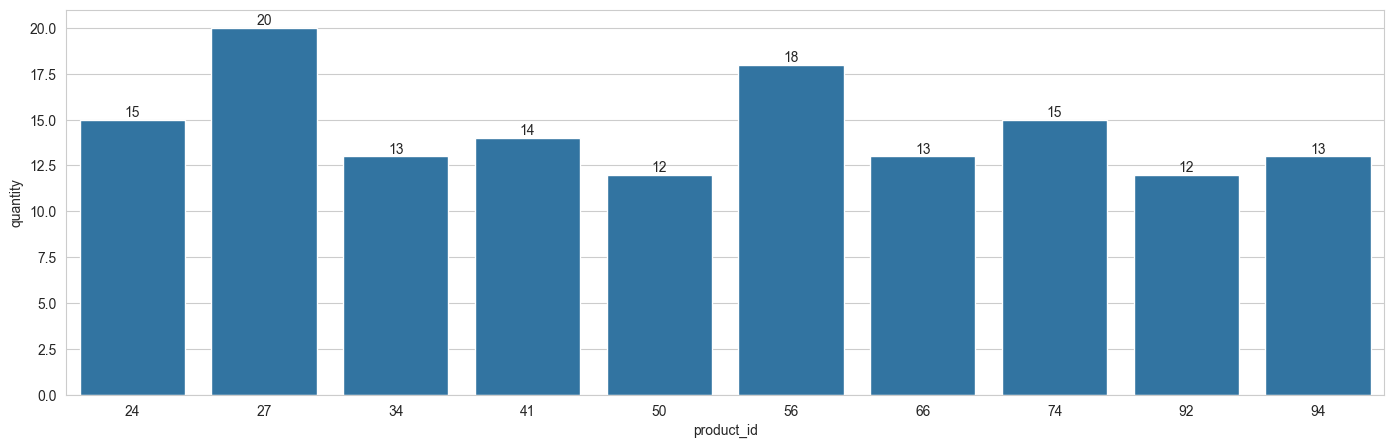

In [94]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.barplot(data=top.head(10), x='product_id', y='quantity', ax=ax)
ax.bar_label(ax.containers[0])